# k sivarama krishna
# BL.EN.U4AIE21063


#  A1. Use librosa.effects.trim()to remove the silence parts of speech from beginning and end of your recorded signal.Listen to the new signal and perceptually compare the audio with original.

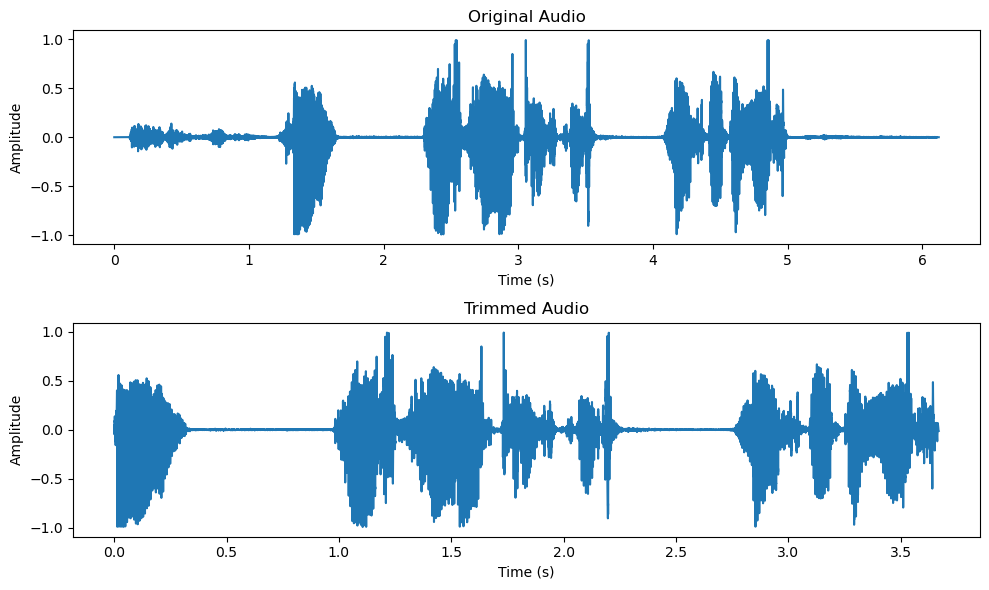

Original Audio:


Trimmed Audio:


In [34]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython.display import Audio
original_audio_file = "trim.wav"
y, sr = librosa.load(original_audio_file, sr=None)

trimmed_y, index = librosa.effects.trim(y, top_db=10)
 
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Trimming the beginning and ending silence
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(trimmed_y)) / sr, trimmed_y)
plt.title('Trimmed Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("Original Audio:")
display(Audio(data=y, rate=sr))

print("Trimmed Audio:")
display(Audio(trimmed_y, rate=sr))


# A2. Use librosa.effects.split()to splitthe recorded speech with detected silences.Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

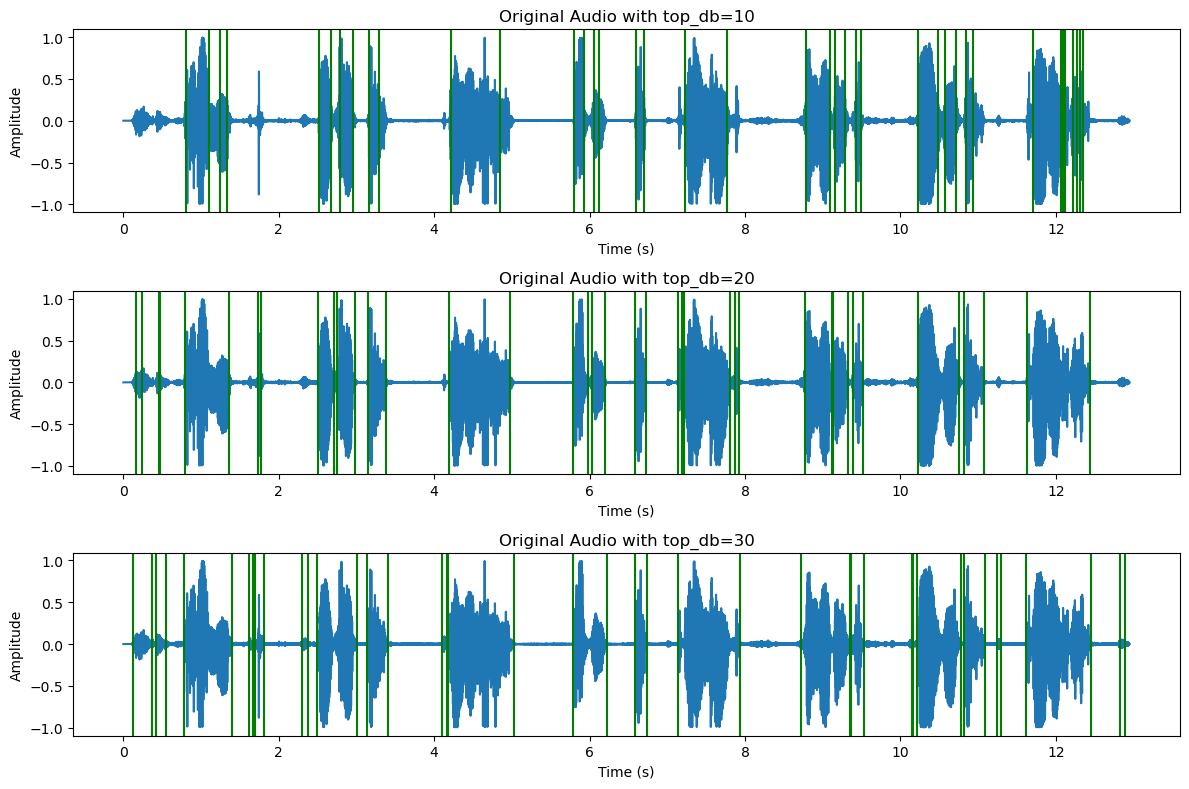

Split Audio with top_db=10:


Split Audio with top_db=20:


Split Audio with top_db=30:


In [42]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "split.wav"
y, sr = librosa.load(original_audio_file, sr=None)

top_db_values = [10,20,30]  # different top_db values

plt.figure(figsize=(12, 8))

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f'Original Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    for interval in intervals:
        plt.axvline(interval[0] / sr, color='green', linestyle='-')
        plt.axvline(interval[1] / sr, color='green', linestyle='-')

plt.tight_layout()
plt.show()

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])

    print(f"Split Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))

    # As the top_db rate increases the silencences in between also increases

# A3. Use the IEEE paper reference available above for silence detection. Compare the results with the silence detection output from librosa package. 

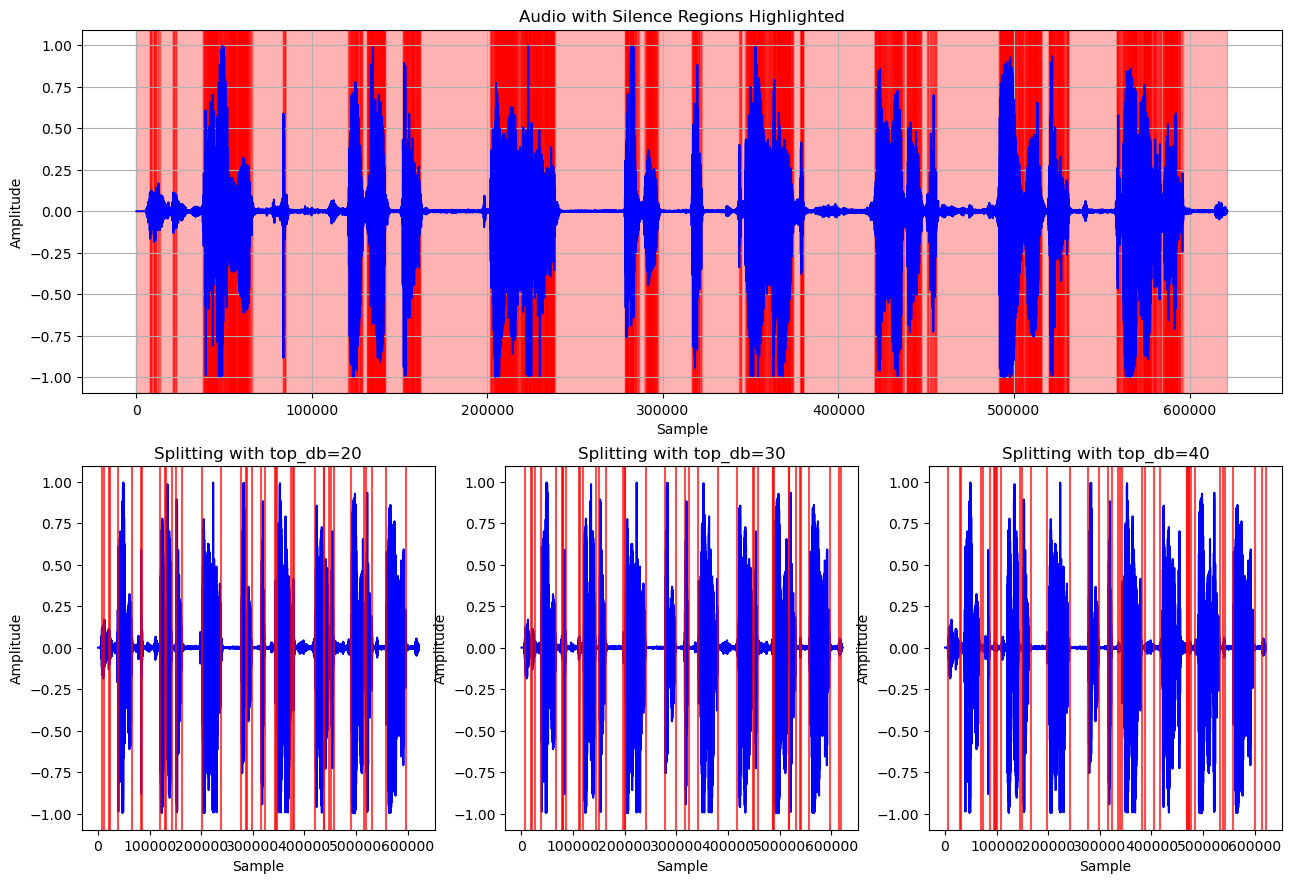

In [48]:
def calculate(signal):
    signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(signal)  # Calculate the total energy by summing the squared samples
    return energy


def detect_silence(signal, threshold):
    energy = calculate(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

file_path = "split.wav"
y, sr = librosa.load(file_path, sr=None)

# Defining an energy threshold for silence detection
energy_threshold = 0.01  

# For silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(y):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)
top_db_values = [20, 30, 40]  
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(y, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(y, top_db=top_db)
    plt.plot(y, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='r', linestyle='-', alpha=0.7)
        plt.axvline(interval[1], color='r', linestyle='-', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()